## I-94 Exchange Rates Data Visualization
Magnus Skonberg | January 24th 2023

### Project Intro

The purpose of this project is to generate a "pro level", audience-friendly explanatory data visualization using:
* information design principles (familiarity and maximizing the data-ink ratio),
* data visualization storytelling and built-in styles via Matplotlib, and
* Gestalt principles and pre-attentitive attributes for visual patterns.

We'll use a dataset that describes USD-Euro daily exchange rates from 1999 to 2021. Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank.

Let's begin and see what visualization we come up with!

### Load Data

To start we read in our data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

#Initial EDA
exchange_rates.head(5)
exchange_rates.tail(5)
exchange_rates.info() #column info
#exchange_rates.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Some early takeaways:
* there are 5699 rows and 41 columns,
* each column represents a nation's currency exchange rate against the EURO,
* the data starts with recent data (2021-01-08) and ends with distant data (1999-01-08),
* the data types are of mixed type and length based on the nation,
* there appears to be a fair bit of NULL data in our set although USD appears to be complete.

## Data Cleaning

Before we jump in to the visualizations, there's a bit of data cleaning that needs to be done:

In [2]:
# rename the [US dollar ] and Period\Unit: columns to something easier to type — US_dollar and Time
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)

# change the Time column to a datetime data type
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# sort the values by Time in ascending order
exchange_rates.sort_values('Time', inplace=True)

# reset the index (and drop the initial index)
exchange_rates.reset_index(drop=True, inplace=True)

# isolate Time and US_dollar columns
euro_to_dollar = exchange_rates[['Time','US_dollar']]

# observe (and comment on) US dollar value counts
euro_to_dollar['US_dollar'].value_counts() # 62 counts of "-"

# drop rows where "-" appears in US_dollar column
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'].value_counts() # verify removal of "-"

# convert US_dollar column to float
euro_to_dollar['US_dollar'].astype(float)

0       1.1789
1       1.1790
2       1.1743
3       1.1632
4       1.1659
         ...  
5694    1.2296
5695    1.2271
5696    1.2338
5697    1.2276
5698    1.2250
Name: US_dollar, Length: 5637, dtype: float64

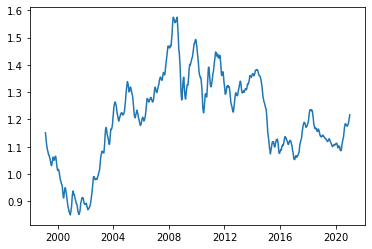

In [3]:
# calculate 30 day rolling mean
## the larger the rolling window, the smoother the line and the longer term trend we observe
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

plt.plot(euro_to_dollar['Time'], euro_to_dollar['rolling_mean'])
plt.show()

I'd like to observe and compare the USD-EUR exchange rate from the Obama years (incl. financial crisis) into the Trump years. 

My plan: 

1. take a slice of 2008 - 2021 and 
2. emphasize the different trends via subplot with a % delta for the period of interest (ie. Trump years)

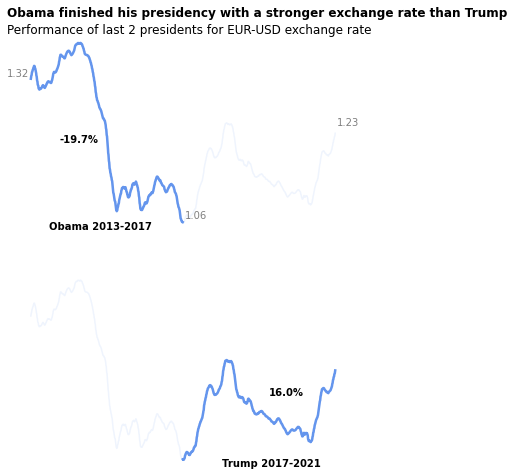

In [14]:
# Filter for time period of interest
filtered_etd = euro_to_dollar.loc[(euro_to_dollar['Time'] >= '2013-01-20')
                     & (euro_to_dollar['Time'] < '2021-01-09')]

# background research - gather values of interest (for text)
filtered_etd.loc[euro_to_dollar['Time'] == '2013-01-21'] # Obama 2nd term start exchange rolling mean: 1.317
filtered_etd.loc[euro_to_dollar['Time'] == '2017-01-20'] # Obama end / Trump start = 1.052
filtered_etd.loc[euro_to_dollar['Time'] == '2021-01-08'] # Trump end: 1.217

# assign values (to be shown on visualization)
obama_start = 1.32
transition = 1.06
obama_pct_chg = round((((transition - obama_start) / obama_start) * 100.00),2) #-19.7
trump_end = 1.23
trump_pct_chg = round((((trump_end - transition) / transition) * 100.00),2) #16.04

#filtered_etd.describe() #2037 entries / 2 ~ 1019 per presidential term

# initialize figure size, subplots, and list of axes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,8))
axes = [ax1, ax2]

# generate initial plots, remove ticks, tick labels, and axes / spines
for ax in axes:
    ax.plot(filtered_etd['Time'], filtered_etd['rolling_mean'],
            color='cornflowerblue', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
# generate overlay plot for 1st axes with quantity and time frame labels as well as titles
ax1.plot(filtered_etd['Time'][:1018], filtered_etd['rolling_mean'][:1018], color='cornflowerblue', linewidth=2.5)
ax1.text(15500, 1.32, obama_start, alpha=0.5)
ax1.text(17200, 1.06, transition, alpha=0.5)
ax1.text(18650, 1.23, trump_end, alpha=0.5)

# add Obama subplot labels
ax1.text(16000, 1.2, '-19.7%', weight='bold')
ax1.text(15900, 1.04, 'Obama 2013-2017', weight='bold')

# add title text
ax1.text(15500, 1.43, 'Obama finished his presidency with a stronger exchange rate than Trump', size=12, weight='bold')
ax1.text(15500, 1.4, 'Performance of last 2 presidents for EUR-USD exchange rate', size=12)    

ax2.plot(filtered_etd['Time'][1018:], filtered_etd['rolling_mean'][1018:], color='cornflowerblue', linewidth=2.5)

# add Trump subplot labels
ax2.text(18000, 1.17, '16.0%', weight='bold')
ax2.text(17550, 1.04, 'Trump 2017-2021', weight='bold')


plt.show()

**Interpretation:**

The start of Obama's second term had the EUR far outpacing the dollar in terms of purchasing power. By the end of his term, the dollar was nearly equivalent with the Euro. Toward the start of Trump's term, the EUR outpaced the dollar in purchasing power (although it didn't hit as high of highs as the start of Obama's 2nd term) and then steadily the US dollar climbed in purchasing power until COVID. During the COVID years, the EUR gained strength versus the US dollar with regard to purchasing power. As such, we can extend that **Obama finished his presidency with a stronger exchange rate than Trump.**